-----
# Analysis of the Training and Test Data
-----

In [ ]:
%cd ..

## Extract Data

In [2]:
from data.helper import read_in_data, add_textual_label


label_json = 'data/sdg_label_mapping.json'

# Task 1
data_json = 'data/raw/swisstext/task1_train.jsonl'
train_data = read_in_data(data_json)
train_data_1 = add_textual_label(label_json, train_data)

# Task 2
data_json = 'data/raw/swisstext/task2_train.jsonl'
train_data = read_in_data(data_json)
train_data_2 = add_textual_label(label_json, train_data)

# Test (results)
data_json = 'data/raw/swisstext/testdata_results.jsonl'
test_data = read_in_data(data_json)
test_data = add_textual_label(label_json, test_data)


In [5]:
print(len(train_data_1))
print(len(test_data))

430
156


In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')


def plot_pie(df):
    label_counts = df['Label'].value_counts()

    # calculate percentages
    total = label_counts.sum()
    percentages = [f'{(count/total)*100:.1f}%' for count in label_counts]
    # set color palette
    colors = sns.color_palette('colorblind')

    # plot as a pie chart
    plt.figure(figsize=(7, 7), facecolor='lightgrey')
    patches, _ = plt.pie(label_counts, startangle=140, colors=colors, pctdistance=0.90)
    plt.title('Distribution of Classes', fontname=font, fontsize=18)
    legend_labels = [f'{label} ({percentage})' for label, percentage in zip(label_counts.index, percentages)]
    plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(0.8, 0.5))
    plt.show()


def plot_classes(df):

    sns.set_style("whitegrid")
    plt.figure(figsize=(7, 4), facecolor='lightgrey')
    sns.countplot(data=df, x='Label', order=df.Label.value_counts().index, color='seagreen', edgecolor='darkgreen')

    plt.title('Distribution of classes', fontsize=18)
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.yticks()
    plt.show()


def computeVisualizeStats(df, level='char'):
    """Function to compute and visualize text statistics:
    - on char level
    - on token level
    """

    def compute_lengths(text):
        if level == 'char':
            return len(text)
        elif level == 'token':
            return len(word_tokenize(text))
        else:
            raise ValueError("specify 'char' or 'token'")

    label_statistics = {}
    for label, group in df.groupby('Label'):
        title_lengths = group['TITLE'].apply(compute_lengths)
        abstract_lengths = group['ABSTRACT'].apply(compute_lengths)
        label_statistics[label] = {
            'Title': {
                'Mean': title_lengths.mean(),
                'Min': title_lengths.min(),
                'Max': title_lengths.max()
            },
            'Abstract': {
                'Mean': abstract_lengths.mean(),
                'Min': abstract_lengths.min(),
                'Max': abstract_lengths.max()
            }
        }

    # Visualization
    labels = []
    title_means = []
    title_mins = []
    title_maxs = []
    abstract_means = []
    abstract_mins = []
    abstract_maxs = []

    for label, stats in label_statistics.items():
        labels.append(label)
        title_means.append(stats['Title']['Mean'])
        title_mins.append(stats['Title']['Min'])
        title_maxs.append(stats['Title']['Max'])
        abstract_means.append(stats['Abstract']['Mean'])
        abstract_mins.append(stats['Abstract']['Min'])
        abstract_maxs.append(stats['Abstract']['Max'])

    plt.figure(figsize=(12, 6), facecolor='lightgrey')
    plt.subplot(1, 2, 1)
    plt.scatter(labels, title_means, color='seagreen', label='Mean')
    plt.scatter(labels, title_mins, color='tomato', label='Min')
    plt.scatter(labels, title_maxs, color='darkslateblue', label='Max')
    plt.title('TITLE Length Statistics\n')
    plt.xlabel('Labels')
    plt.ylabel('Length')
    plt.xticks(rotation=90)
    plt.legend()


    plt.subplot(1, 2, 2)
    if level == 'token':
        plt.scatter(labels, abstract_means, color='seagreen', label='Mean')
        plt.scatter(labels, abstract_mins, color='tomato', label='Min')
        plt.scatter(labels, abstract_maxs, color='darkslateblue', label='Max')
        # ! highlight the area under the recommended abstract length of 300 tokes !
        plt.fill_between(labels, 0, 300, color='pink', alpha=0.3)
    else:
        plt.scatter(labels, abstract_means, color='seagreen', label='Mean')
        plt.scatter(labels, abstract_mins, color='tomato', label='Min')
        plt.scatter(labels, abstract_maxs, color='darkslateblue', label='Max')
    plt.title('ABSTRACT Length Statistics\n')
    plt.xlabel('Labels')
    plt.ylabel('Length')
    plt.xticks(rotation=90)
    plt.legend()



    plt.tight_layout()
    plt.show()


[nltk_data] Downloading package punkt to /Users/shtosti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


---
## Task 1

In [19]:
df = train_data_1
df.head()

,ID,TITLE,ABSTRACT,URL,SDG,Label
0,oai:www.zora.uzh.ch:126666,Identifying phrasemes via interlingual associa...,"In corpus linguistics, statistical association...",https://www.zora.uzh.ch/id/eprint/126666,0,non-relevant
1,oai:www.zora.uzh.ch:106593,Synthesis of tripeptide derivatized cyclopenta...,We describe the syntheses of half-sandwich com...,https://www.zora.uzh.ch/id/eprint/106593,0,non-relevant
2,oai:www.zora.uzh.ch:203310,Intelligence test items varying in capacity de...,There is a strong relationship between fluid i...,https://www.zora.uzh.ch/id/eprint/203310,0,non-relevant
3,oai:www.zora.uzh.ch:145601,Copy number increases of transposable elements...,Evolutionary dynamics of structural genetic va...,https://www.zora.uzh.ch/id/eprint/145601,14,Life Below Water
4,oai:www.zora.uzh.ch:188559,Linguistics : An Interdisciplinary Journal of ...,At the heart of this special issue are partiti...,https://www.zora.uzh.ch/id/eprint/188559,0,non-relevant


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        430 non-null    object
 1   TITLE     430 non-null    object
 2   ABSTRACT  430 non-null    object
 3   URL       430 non-null    object
 4   SDG       430 non-null    int64 
 5   Label     430 non-null    object
dtypes: int64(1), object(5)
memory usage: 20.3+ KB


In [21]:
print(f"Total unique labels: {df.Label.nunique()}")

Total unique labels: 18


In [22]:
df.Label.value_counts()

Label
non-relevant                                156
Climate Action                               50
Life on Land                                 49
Reduced Inequality                           30
Responsible Consumption and Production       21
Decent Work and Economic Growth              21
Peace, Justice, and Strong Institutions      21
Affordable and Clean Energy                  17
Zero Hunger                                  11
Good Health and Well-being                   10
Industry, Innovation, and Infrastructure      9
Gender Equality                               9
No Poverty                                    6
Clean Water and Sanitation                    6
Sustainable Cities and Communities            4
Quality Education                             4
Partnerships for the Goals                    4
Life Below Water                              2
Name: count, dtype: int64

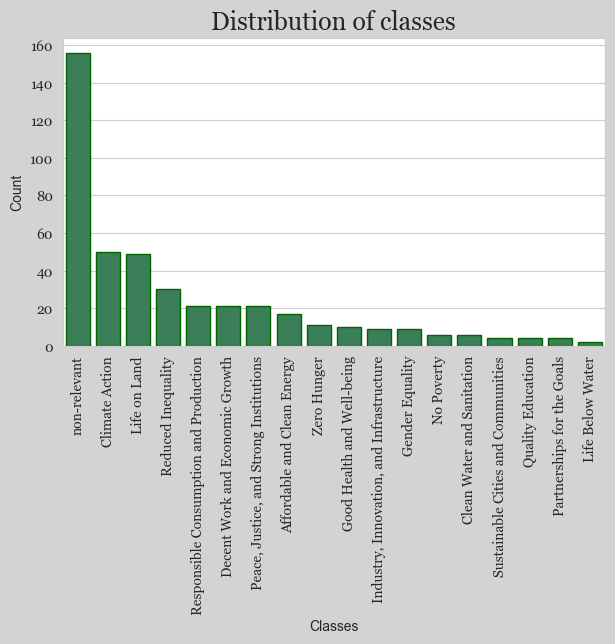

In [23]:
plot_classes(df)

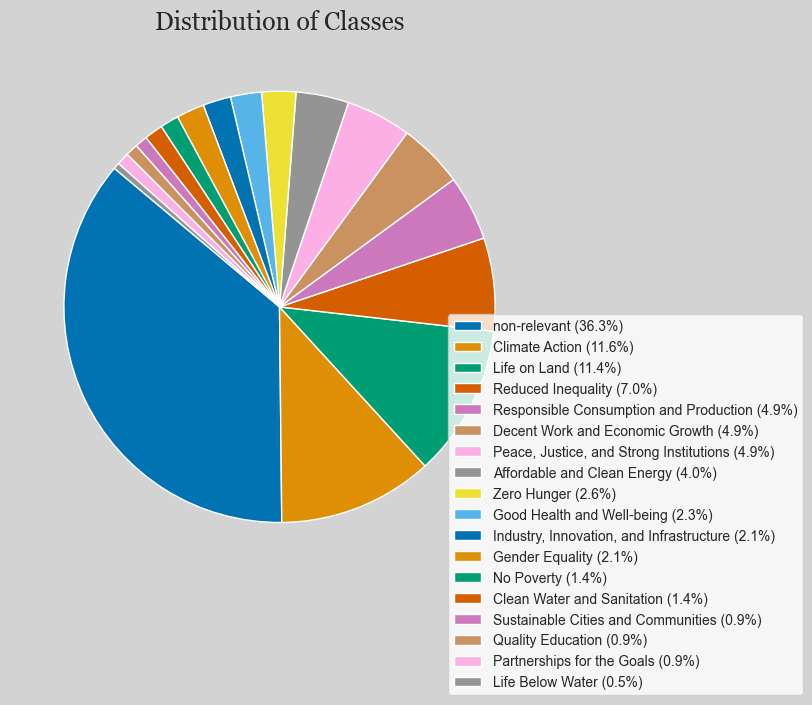

In [24]:
plot_pie(df)

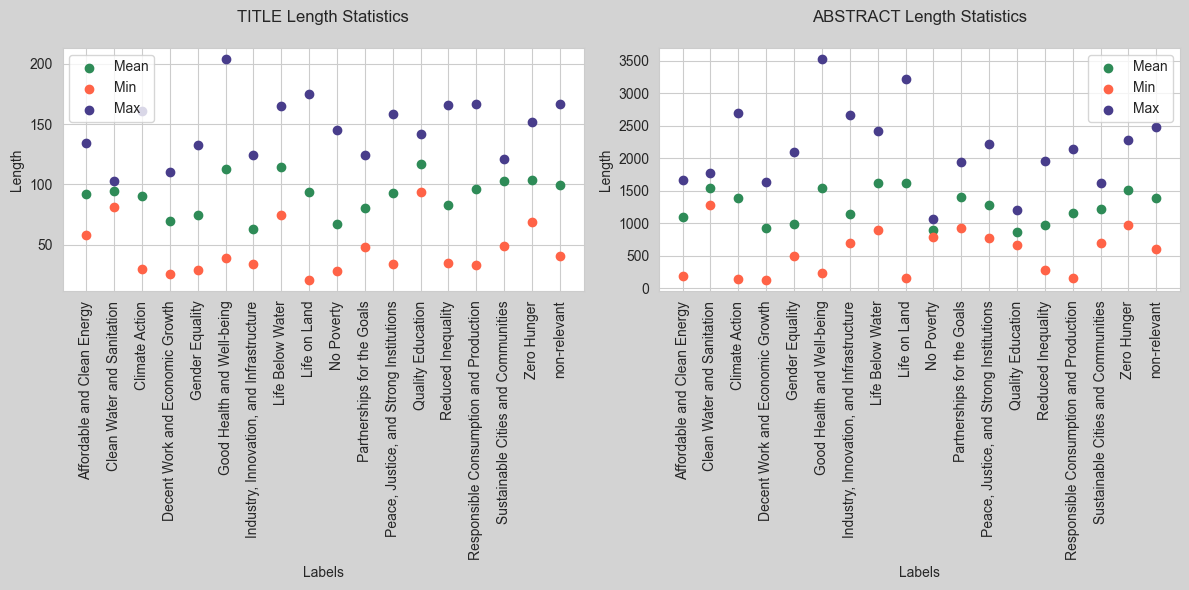

In [9]:
# chars
computeVisualizeStats(df, level='char')

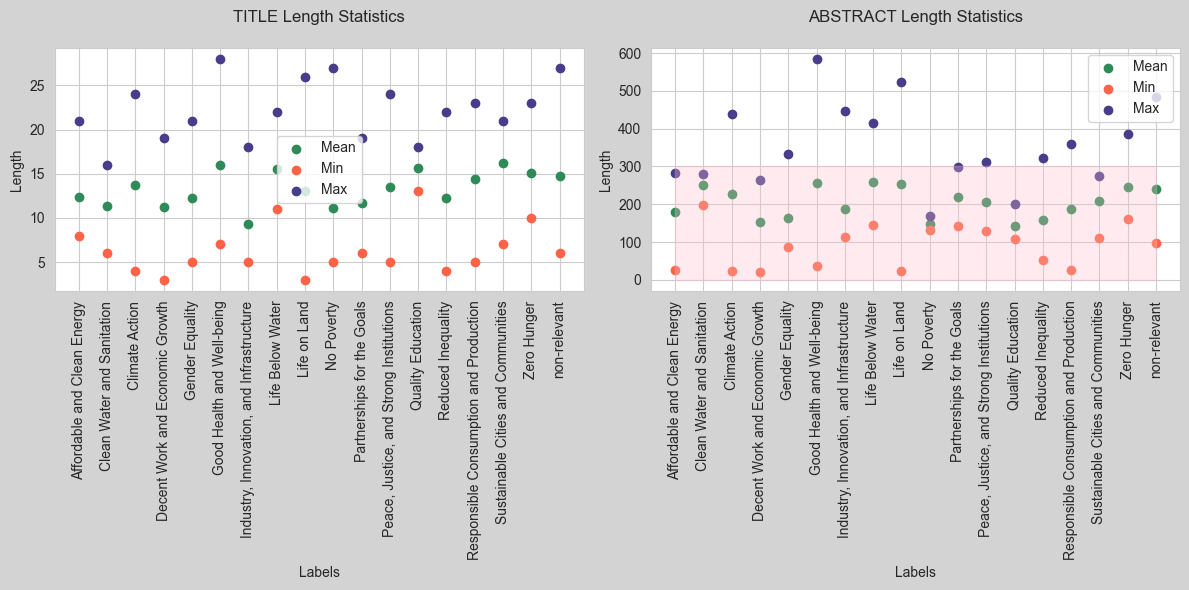

In [27]:
# tokens
computeVisualizeStats(df, level='token')

## Test Data

In [28]:
df = test_data
len(df)

156

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        156 non-null    object
 1   TITLE     156 non-null    object
 2   ABSTRACT  156 non-null    object
 3   URL       156 non-null    object
 4   SDG       156 non-null    int64 
 5   SDGS      156 non-null    object
 6   TARGET    73 non-null     object
 7   TARGETS   156 non-null    object
 8   Label     156 non-null    object
dtypes: int64(1), object(8)
memory usage: 11.1+ KB


In [30]:
df.Label.value_counts()

Label
non-relevant                                83
Partnerships for the Goals                   7
Responsible Consumption and Production       6
Quality Education                            6
Life on Land                                 5
Life Below Water                             5
Decent Work and Economic Growth              5
Industry, Innovation, and Infrastructure     5
Clean Water and Sanitation                   4
Reduced Inequality                           4
Gender Equality                              4
Sustainable Cities and Communities           4
Zero Hunger                                  4
Affordable and Clean Energy                  3
No Poverty                                   3
Good Health and Well-being                   3
Peace, Justice, and Strong Institutions      3
Climate Action                               2
Name: count, dtype: int64

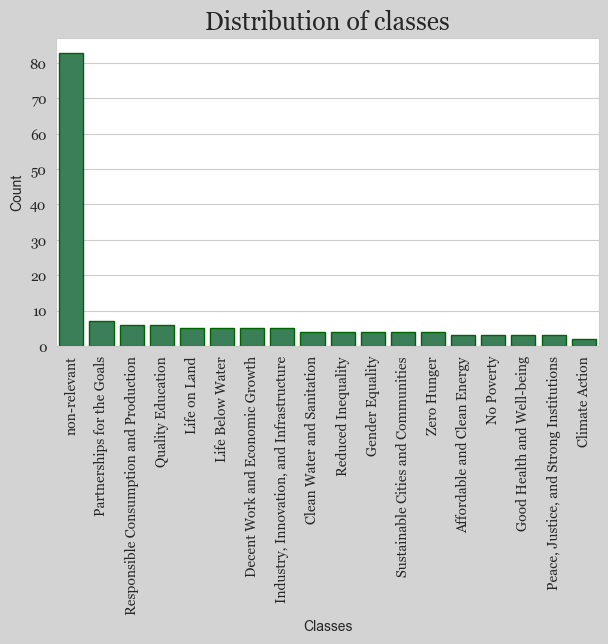

In [31]:
plot_classes(df)

## Compare train and test

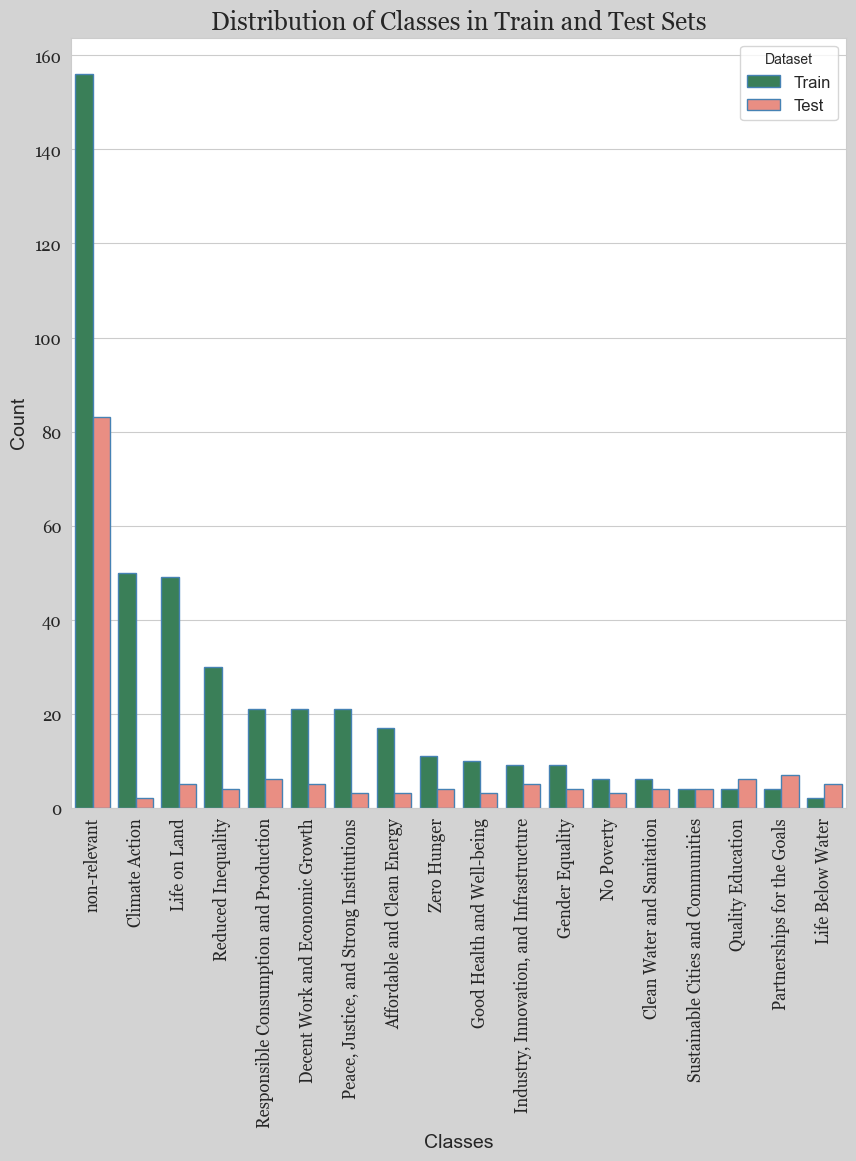

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_classes_compare(train_df, test_df):
    # Add a column to indicate whether the data is from the train or test set
    train_df['Set'] = 'Train'
    test_df['Set'] = 'Test'

    # Combine the two dataframes
    combined_df = pd.concat([train_df, test_df])

    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10), facecolor='lightgrey')

    # Plot the combined data with different colors for train and test sets
    sns.countplot(data=combined_df, x='Label', hue='Set', order=train_df.Label.value_counts().index, palette={'Train': 'seagreen', 'Test': 'salmon'}, edgecolor='steelblue')
    
    font = "Georgia"
    plt.title('Distribution of Classes in Train and Test Sets', fontname=font, fontsize=18)
    plt.xlabel('Classes', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=90, fontname=font, fontsize=12)
    plt.yticks(fontname=font, fontsize=12)
    plt.legend(title='Dataset', fontsize=12)
    plt.show()

# Example usage with train_data_1 and test_data
plot_classes_compare(train_df=train_data_1, test_df=test_data)


Chi-Square Test:
Chi2 Statistic: 63.616492064846376
P-value: 2.627334297751073e-07
Degrees of Freedom: 17

Expected Frequencies:
[[  5.32423208  14.67576792]
 [  2.66211604   7.33788396]
 [ 13.84300341  38.15699659]
 [  6.92150171  19.07849829]
 [  3.46075085   9.53924915]
 [  3.46075085   9.53924915]
 [  3.72696246  10.27303754]
 [  1.86348123   5.13651877]
 [ 14.37542662  39.62457338]
 [  2.39590444   6.60409556]
 [  2.92832765   8.07167235]
 [  6.3890785   17.6109215 ]
 [  2.66211604   7.33788396]
 [  9.05119454  24.94880546]
 [  7.18771331  19.81228669]
 [  2.12969283   5.87030717]
 [  3.99317406  11.00682594]
 [ 63.62457338 175.37542662]]


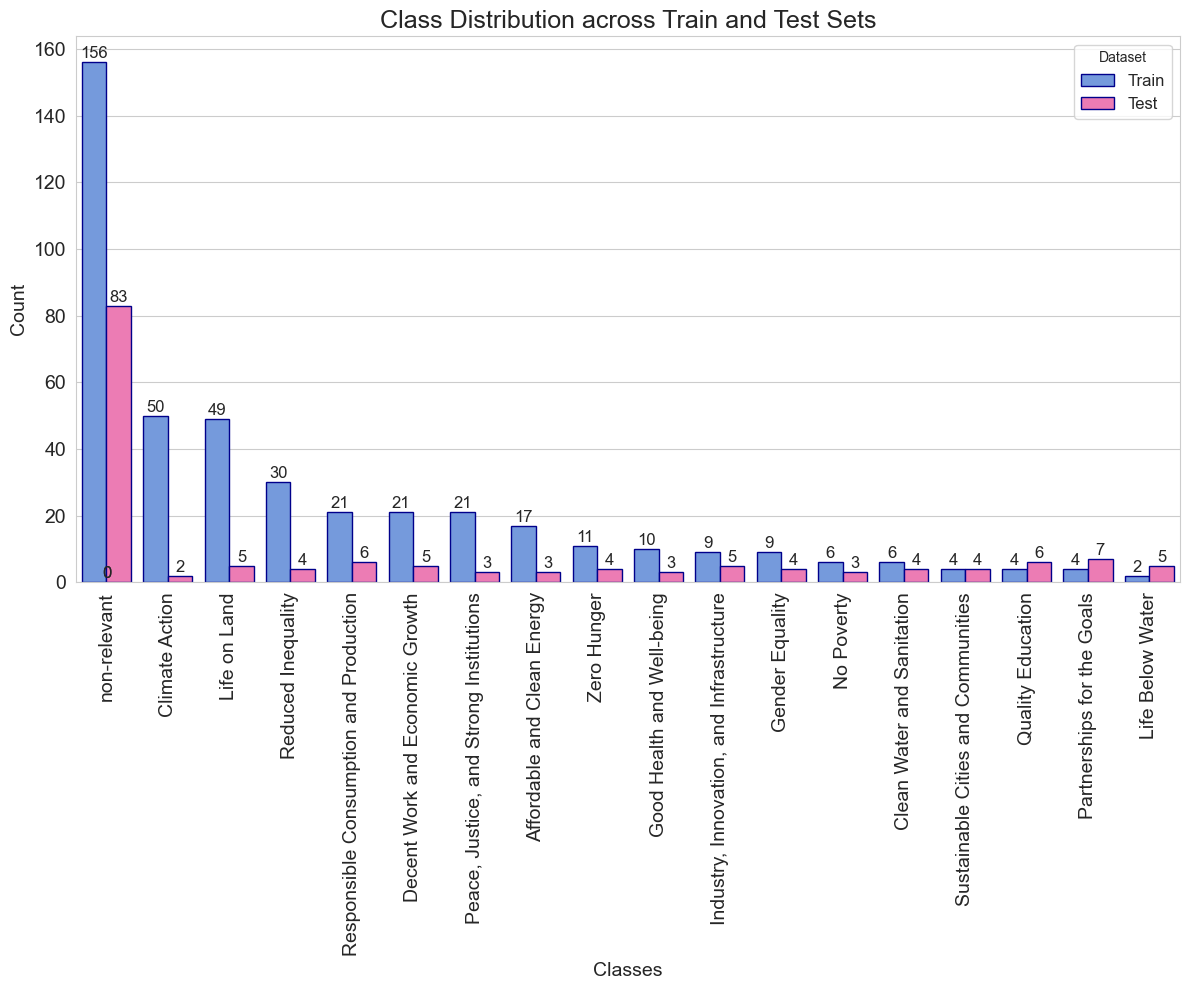

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency

def plot_classes_compare(train_df, test_df):
    # Add a column to indicate whether the data is from the train or test set
    train_df['Set'] = 'Train'
    test_df['Set'] = 'Test'

    # Combine the two dataframes
    combined_df = pd.concat([train_df, test_df])

    # Create a contingency table
    contingency_table = pd.crosstab(combined_df['Label'], combined_df['Set'])

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-Square Test:\nChi2 Statistic: {chi2}\nP-value: {p}\nDegrees of Freedom: {dof}\n")
    print(f"Expected Frequencies:\n{expected}")

    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 10), facecolor='white')

    # Plot the combined data with different colors for train and test sets
    ax = sns.countplot(data=combined_df, x='Label', hue='Set', order=train_df.Label.value_counts().index, palette={'Train': 'cornflowerblue', 'Test': 'hotpink'}, edgecolor='darkblue', orient='h')
    # Add exact numbers on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 1.2, int(height), ha="center", fontsize=12)
    
    # font = "DejaVu_Sans"
    plt.title('Class Distribution across Train and Test Sets', fontsize=18)
    plt.xlabel('Classes', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(title='Dataset', fontsize=12)
    plt.tight_layout()

    plt.savefig('./class_distribution_task_v.pdf')
    plt.show()

# Example usage with train_data_1 and test_data
plot_classes_compare(train_df=train_data_1, test_df=test_data)


Chi-Square Test:
Chi2 Statistic: 63.616492064846376
P-value: 2.627334297751073e-07
Degrees of Freedom: 17

Expected Frequencies:
[[  5.32423208  14.67576792]
 [  2.66211604   7.33788396]
 [ 13.84300341  38.15699659]
 [  6.92150171  19.07849829]
 [  3.46075085   9.53924915]
 [  3.46075085   9.53924915]
 [  3.72696246  10.27303754]
 [  1.86348123   5.13651877]
 [ 14.37542662  39.62457338]
 [  2.39590444   6.60409556]
 [  2.92832765   8.07167235]
 [  6.3890785   17.6109215 ]
 [  2.66211604   7.33788396]
 [  9.05119454  24.94880546]
 [  7.18771331  19.81228669]
 [  2.12969283   5.87030717]
 [  3.99317406  11.00682594]
 [ 63.62457338 175.37542662]]


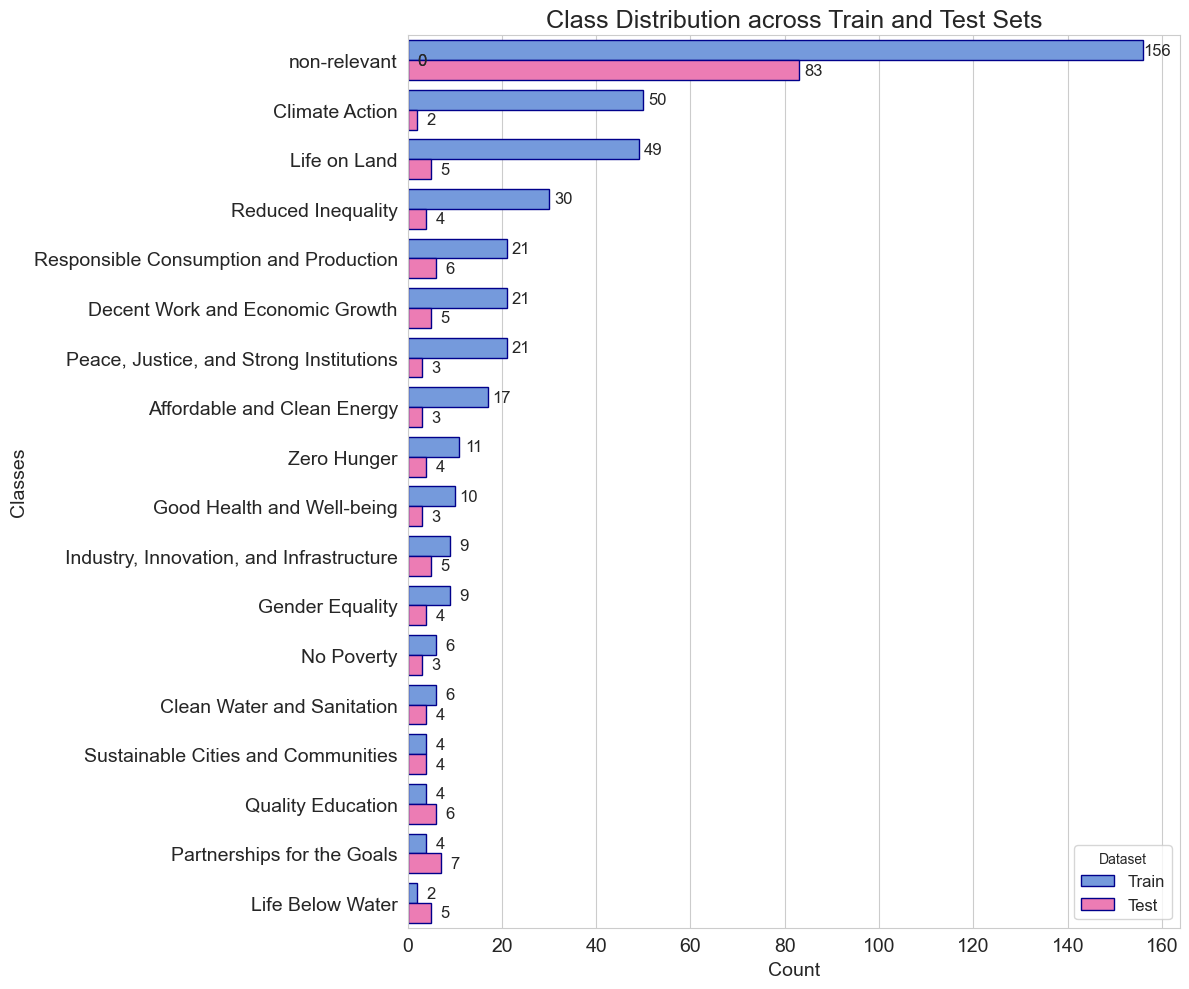

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency

def plot_classes_compare(train_df, test_df):
    # add a column to indicate train or test set
    train_df['Set'] = 'Train'
    test_df['Set'] = 'Test'

    # Combine the two dataframes
    combined_df = pd.concat([train_df, test_df])

    # Create a contingency table
    contingency_table = pd.crosstab(combined_df['Label'], combined_df['Set'])

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-Square Test:\nChi2 Statistic: {chi2}\nP-value: {p}\nDegrees of Freedom: {dof}\n")
    print(f"Expected Frequencies:\n{expected}")

    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 10), facecolor='white')

    # Plot the combined data with different colors for train and test sets
    ax = sns.countplot(data=combined_df, y='Label', hue='Set', order=train_df.Label.value_counts().index, palette={'Train': 'cornflowerblue', 'Test': 'hotpink'}, edgecolor='darkblue')
    
    # Add exact numbers on top of each bar
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 3, p.get_y() + p.get_height() / 2., int(width), ha="center", va="center", fontsize=12)

    plt.title('Class Distribution across Train and Test Sets', fontsize=18)
    plt.xlabel('Count', fontsize=14)
    plt.ylabel('Classes', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(title='Dataset', fontsize=12)
    plt.tight_layout()

    plt.savefig('./class_distribution_task_h.pdf')
    plt.show()

# Example usage with train_data_1 and test_data
plot_classes_compare(train_df=train_data_1, test_df=test_data)


## Our combined dataset

In [91]:
import torch
import pandas as pd
from src.data.dataset import TrainSwissTextDataset
from src.data.preprocessor import TrainSwissTextPreprocessor
import seaborn as sns
import matplotlib.pyplot as plt

13662 3416 0


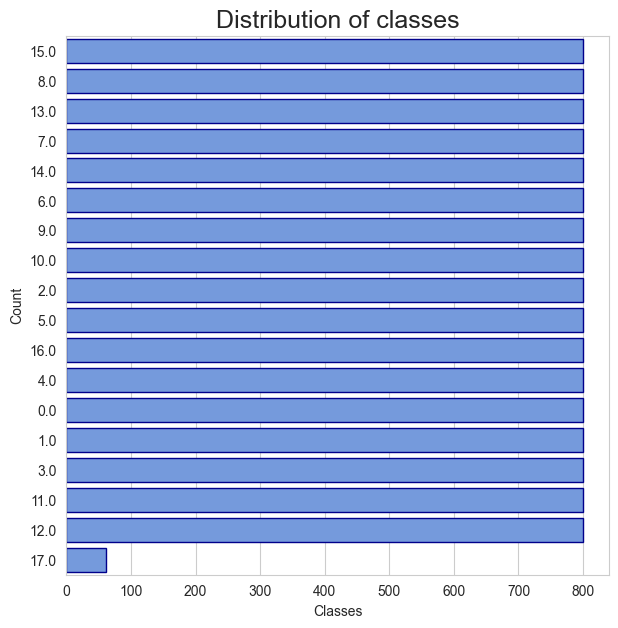

In [106]:
# Instantiate the dataset
dataset_name = 'all'
dataset = TrainSwissTextDataset.create_instance(dataset=dataset_name, model_name='mbert', use_val=False)

train_df, test_df, val_df = dataset.get_train_test_val()
print(len(train_df), len(test_df), len(val_df))


def plot_classes(df):

    sns.set_style("whitegrid")
    plt.figure(figsize=(7, 7), facecolor='white')
    sns.countplot(data=df, y='sdg', order=df.sdg.value_counts().index, color='cornflowerblue', edgecolor='darkblue')

    plt.title('Distribution of classes', fontsize=18)
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.xticks()
    plt.yticks()
    plt.show()

plot_classes(df=train_df)